In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read data
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/NewspaperData.csv')
df

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [3]:
#Select relevant columns

In [6]:
data = df[['daily','sunday']]
data

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='daily', ylabel='sunday'>

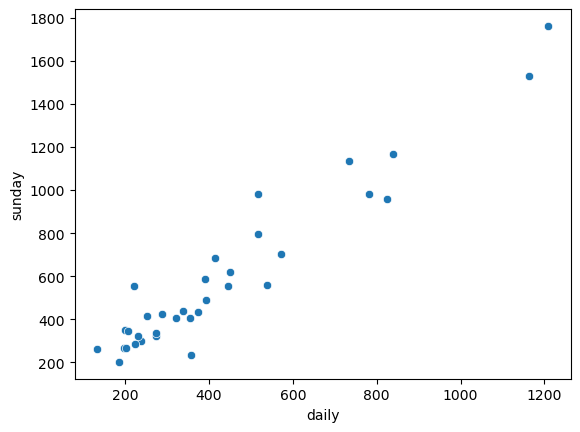

In [7]:
sns.scatterplot(df['daily'],df['sunday'])

In [5]:
#Correlation analysis

In [8]:
df.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<AxesSubplot:>

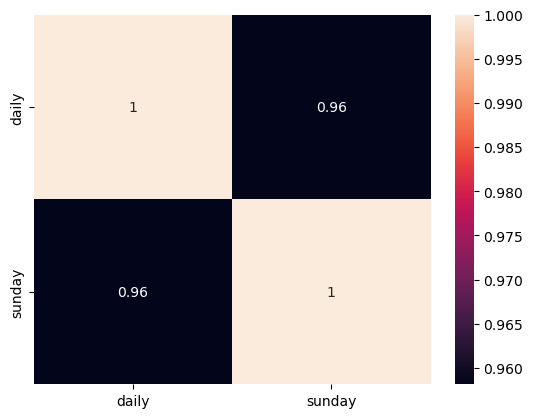

In [10]:
sns.heatmap(df.corr(),annot=True)

In [6]:
#Import statsmodels

In [11]:
import statsmodels.formula.api as smf

In [12]:
model = smf.ols('sunday~daily',data=data).fit()

In [7]:
#Model parameters

In [13]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [14]:
data.head()

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


In [16]:
#line equation
x = 500

y =  1.339715*x+ 13.835630
y

683.69313

In [18]:
#Print values for t value and p value
model.pvalues

Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64

In [19]:
#r2 value
model.rsquared

0.9180596895873294

# Prediction for new data

In [20]:
newdf = pd.DataFrame({
    'daily' : [200,518,654,452,654]
})

In [21]:
newdf

,daily
0,200
1,518
2,654
3,452
4,654


In [22]:
model.predict(newdf)

0    281.778581
1    707.807874
2    890.009081
3    619.386700
4    890.009081
dtype: float64

# Data Transformation
1. Sqrt 
2. Log

C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


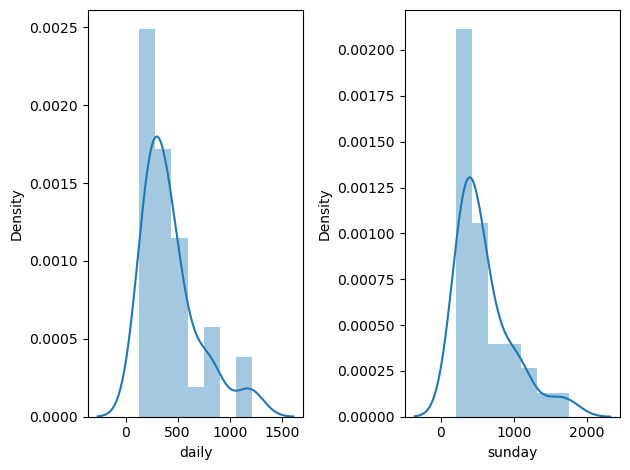

In [25]:
plt.subplot(1,2,1)
sns.distplot(df['daily'])

plt.subplot(1,2,2)
sns.distplot(df['sunday'])
plt.tight_layout()

In [26]:
data['daily'].skew()

1.5321591323040094

In [27]:
data['sunday'].skew()

1.5644730738925112

# Log Transformation

In [29]:
data.head(2)

,daily,sunday
0,391.952,488.506
1,516.981,798.298


In [32]:
data['log_sunday'] = np.log(data['sunday'])
data['log_daily'] = np.log(data['daily'])

In [33]:
data

,daily,sunday,log_sunday,log_daily
0,391.952,488.506,6.191352,5.971139
1,516.981,798.298,6.682482,6.248006
2,355.628,235.084,5.459943,5.873885
3,238.555,299.451,5.701951,5.474600
4,537.780,559.093,6.326316,6.287450
5,733.775,1133.249,7.032844,6.598202
6,198.832,348.744,5.854338,5.292460
7,252.624,417.779,6.034953,5.531902
8,206.204,344.522,5.842158,5.328866
9,231.177,323.084,5.777912,5.443184


C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


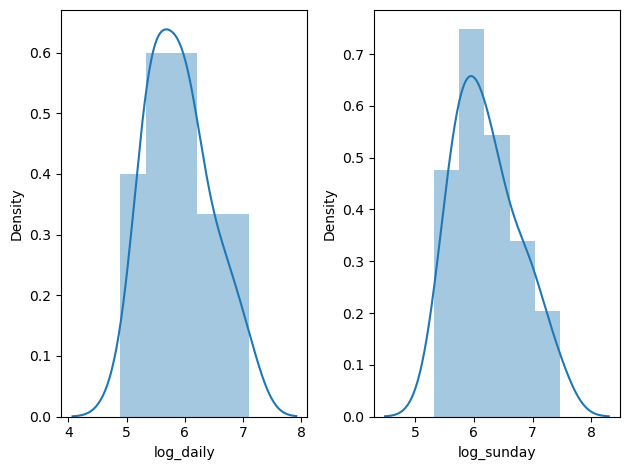

In [34]:
plt.subplot(1,2,1)
sns.distplot(data['log_daily'])

plt.subplot(1,2,2)
sns.distplot(data['log_sunday'])
plt.tight_layout()

In [35]:
data['log_daily'].skew()

0.4682202000020356

In [36]:
data['log_sunday'].skew()

0.5337572087816101

In [37]:
#Sqrt transformation

# WC dataset

In [11]:
#import data
#Create/ fit the data in model
#Get the prediction